#  Online Retail Sale Dataset

#### The dataset is used to perform statistical analysis and Visualisation . 
#### This dataset is from an Open Public Data source Kaggle :

#### [Online Retails Sale Dataset](https://www.kaggle.com/datasets/rohitmahulkar/online-retails-sale-dataset)






##  Basic information of this dataset

### summary:
- <font size="3"> The dataset has 541909 rows and 10 columns.</font>
- <font size="3"> The data type includes string, integer, float, datetime.</font>


###   Dataset Glossary (Column-Wise)
---  ------       --------------   -----         
1. InvoiceNo: Reciept No. for successfull order
2. InvoiceDate:  date in which order place
3. InvoiceTime: time stamp in which order place relevant to geoghraphical location
4. StockCode: unique code of each product
5. unique code of each product
6. Description : Name of product (conatin some missing name of prodect which are return , damageded, lost etc..)
7. Quantity: number of quantity of product sold (conatain negative number of quantity which are return,damageded
8. UnitPrice: selling price of single unit of prodcut
10. Totalsale: Total of selling price
11. CustomerID :
12. Country: Country name



## 1.  Load in Data
#### Import numpy, pandas and matplotlib libraries. 

In [155]:
# import possible libraries that could be used in this data analisis
import numpy as np
import pandas as pd
from datetime import datetime
import csv

#set path(directory) to import and export all the files
import os
os.getcwd()
os.chdir('/users/yinli/Downloads')


#load in data using pandas. 
# using parse_dates parameter to turn string into real datetime type
# this data have AM/PM included , so i used 'I 'to replace 'H' in the format
df = pd.read_csv('Online Retail.csv', parse_dates=['InvoiceTime'], date_parser=lambda x:pd.to_datetime(x, format='%I:%M:%S %p'))
df.shape # the data has 541909 rows and 10 columns

df.info()
            

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   InvoiceDate  541909 non-null  object        
 2   InvoiceTime  541909 non-null  datetime64[ns]
 3   StockCode    541909 non-null  object        
 4   Description  540455 non-null  object        
 5   Quantity     541909 non-null  int64         
 6   UnitPrice    541909 non-null  float64       
 7   Totalsale    541909 non-null  float64       
 8   CustomerID   406829 non-null  float64       
 9   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(5)
memory usage: 41.3+ MB


## 2. date time manipulating
#### -  convert data type into string, datetime ect.
#### -  spliting on date attribute (i.e. day of week, month and year)

In [190]:
# convert 'CustomerID' from type flaot to string
df.CustomerID = df.CustomerID.astype(str)


# in 'InvoiceTime' there is "1900-01-01" which means the '%d-%m-%Y' is empty. so I just leave it

# convert InvoiceDate into datetime
df.InvoiceDate = pd.to_datetime(df['InvoiceDate'], format='%d-%m-%Y')

# splitting the date                                          
df['year'] = pd.to_datetime(df['InvoiceDate']).dt.year
df['weekdays'] = pd.to_datetime(df['InvoiceDate']).dt.day_name()
df['month'] = pd.to_datetime(df['InvoiceDate']).dt.month

df.head()


,InvoiceNo,InvoiceDate,InvoiceTime,StockCode,Description,Quantity,UnitPrice,Totalsale,CustomerID,Country,year,weekdays,month
42481,539993,2011-01-04,1900-01-01 10:00:00,22386,JUMBO BAG PINK POLKADOT,10,1.95,19.5,13313.0,United Kingdom,2011,Tuesday,1
42482,539993,2011-01-04,1900-01-01 10:00:00,21499,BLUE POLKADOT WRAP,25,0.42,10.5,13313.0,United Kingdom,2011,Tuesday,1
42483,539993,2011-01-04,1900-01-01 10:00:00,21498,RED RETROSPOT WRAP,25,0.42,10.5,13313.0,United Kingdom,2011,Tuesday,1
42484,539993,2011-01-04,1900-01-01 10:00:00,22379,RECYCLING BAG RETROSPOT,5,2.10,10.5,13313.0,United Kingdom,2011,Tuesday,1
42485,539993,2011-01-04,1900-01-01 10:00:00,20718,RED RETROSPOT SHOPPER BAG,10,1.25,12.5,13313.0,United Kingdom,2011,Tuesday,1


## 3. cleaning up the data, drop the unvalid data

In [191]:

#in year 2010 only there are only data of December, but 2011 has 12 months data.
# inorder to be comparison , drop all the data in 2010 december.
drop_date=df[(df.InvoiceDate < pd.Timestamp('2011-12-31')) &  (df.InvoiceDate < pd.Timestamp('2011-01-01'))].index
df.drop(drop_date,inplace=True)


#use sort() to check the invalid data
# check from the smallest value
df.sort_values(by=['UnitPrice'])

# there is some values of in 'UnitPrice','Quantity' and Totalsale < = 0, these values need to remove
# drop all the rows with UnitPrice < = 0
df=df[(df.UnitPrice > 0) & (df.Quantity > 0 )& (df.Totalsale > 0)]


#check if any unitprice is too high and need to clean
df1 = df.sort_values(['UnitPrice'], ascending=False)
df1.head(50)
# there are some description in 'Description' with name 'AMAZON FEE','Adjust bad debt','POSTAGE','DOTCOM POSTAGE','Manual'
# this indicated that the items link to the prespscription are not real items, need to remove
list1=['AMAZON FEE','Adjust bad debt','POSTAGE','DOTCOM POSTAGE','Manual']
df2=df.loc[df.Description.isin(list1)].index
df2
df.drop(df2,inplace=True)

#use sort() to double check if all the unvalid data are successfully romoved
df.sort_values(['UnitPrice'], ascending=False)
df.sort_values(by=['UnitPrice'])
df.sort_values(['Quantity'], ascending=False)
e=df.sort_values(['Totalsale'], ascending=False)
e.head()


,InvoiceNo,InvoiceDate,InvoiceTime,StockCode,Description,Quantity,UnitPrice,Totalsale,CustomerID,Country,year,weekdays,month
540421,581483,2011-12-09,1900-01-01 09:15:00,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2.08,168469.60,16446.0,United Kingdom,2011,Friday,12
61619,541431,2011-01-18,1900-01-01 10:01:00,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,1.04,77183.60,12346.0,United Kingdom,2011,Tuesday,1
222680,556444,2011-06-10,1900-01-01 15:28:00,22502,PICNIC BASKET WICKER 60 PIECES,60,649.50,38970.00,15098.0,United Kingdom,2011,Friday,6
348325,567423,2011-09-20,1900-01-01 11:05:00,23243,SET OF TEA COFFEE SUGAR TINS PANTRY,1412,5.06,7144.72,17450.0,United Kingdom,2011,Tuesday,9
160546,550461,2011-04-18,1900-01-01 13:20:00,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114,2.10,6539.40,15749.0,United Kingdom,2011,Monday,4


In [186]:
# create a new dataset of the original data copy. It is a best way to not overwrite the original data files.
df1=df.copy()
df1.info()
# the data type of 'year','month','weekdays' are not datetime type. 
# but in this analysis, the data type will not impact on the result,i will not convert it into datetime.
# no missing data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 486615 entries, 42481 to 541908
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    486615 non-null  object        
 1   InvoiceDate  486615 non-null  datetime64[ns]
 2   InvoiceTime  486615 non-null  datetime64[ns]
 3   StockCode    486615 non-null  object        
 4   Description  486615 non-null  object        
 5   Quantity     486615 non-null  int64         
 6   UnitPrice    486615 non-null  float64       
 7   Totalsale    486615 non-null  float64       
 8   CustomerID   486615 non-null  object        
 9   Country      486615 non-null  object        
 10  year         486615 non-null  int64         
 11  weekdays     486615 non-null  object        
 12  month        486615 non-null  int64         
dtypes: datetime64[ns](2), float64(2), int64(3), object(6)
memory usage: 52.0+ MB


## 4. plotting section

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(11, 4)})

## 4.1 Time series chart
#### I will use time seires plot to illustrates how frequently an item was sold at successive intervals of time. 
####  Each point on the chart corresponds to both a time and a quantity that is being measured.

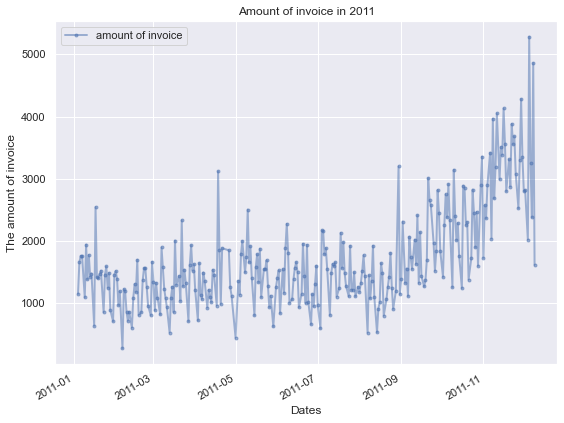

In [183]:
# I used .value_count() to count how many invoice were produced in each day 
f=df1.InvoiceDate.value_counts()
axes=f.plot(marker='.', alpha=0.5, linewidth=2,figsize=(9, 7),title='Amount of invoice in 2011')
# set the label attributes of the axes
axes.set_xlabel('Dates')
axes.set_ylabel('The amount of invoice' )

axes.legend(['amount of invoice'],loc='upper left')
# we can see from the plot that from January to September, the amount of invoice has no significant different, but increases from September and reaches peak in December


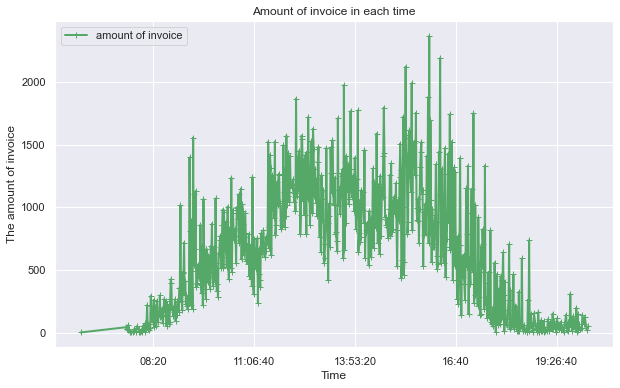

In [184]:
#  how many invoice were produced in each time
t= df1.InvoiceTime.dt.time.value_counts()
axes=t.plot(marker='+', color='g', linewidth=2,figsize=(10, 6),title='Amount of invoice in each time')
# set the label attributes of the axes
axes.set_xlabel('Time')
axes.set_ylabel('The amount of invoice' )
axes.legend(['amount of invoice'],loc='upper left')
# the peak time to produce invoice is arount 3PM and 4PM


## 4.2  Pie plot
###  I used Pie Plot to determine how much percentage of total sale each is in each week day

<AxesSubplot:title={'center':'Weekdays sale pie plot'}, ylabel='Totalsale'>

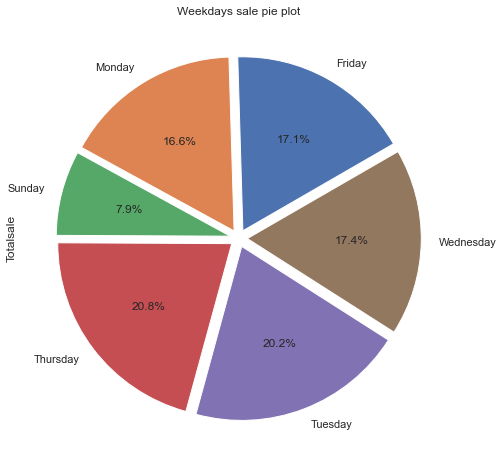

In [160]:
# show the totalsale in each day of weekdays 
weekday_sale = df1.groupby(['weekdays'])['Totalsale'].sum()
weekday_sale
weekday_sale.plot.pie(explode=[0.05,0.05,0.05,0.05,0.05,0.05],autopct='%1.1f%%', 
                                            figsize=(10,8), 
                                            title = 'Weekdays sale pie plot',
                                            startangle=30)
                                            

## 4.3  Bar Plot
### A bar plot is a plot that presents categorical data with rectangular bars with lengths proportional to the values that they represent. 

### A bar plot shows comparisons among discrete categories ( each month). 

Text(0.5, 0, 'Mean selling of price')

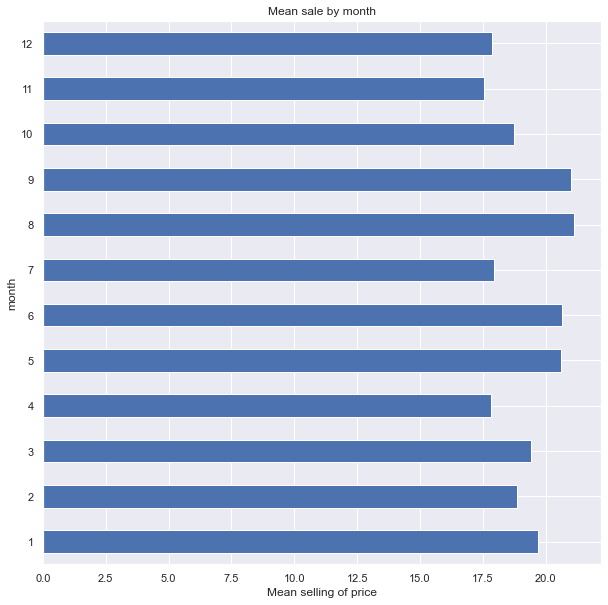

In [125]:
month_bar= df1.groupby('month')['Totalsale'].mean()

plot = month_bar.plot.barh(title="Mean sale by month", figsize=(10,10))

plot.set_xlabel('Mean selling of price')


## 4.4 Box plot

#### Box plot sees high_level distribution of the data, from its smallest expected value to the largest expected value. 

#### Box plots are also good for seeing if the data is symmetrical. 

#### In this case, I used  boxenplot  to determine the level of distribution of the Totalsale in different countries

## 4.4.1 Data manipulating 
#### Because there are over 60 countries in this dataframe, only the countries whose totalsale are over 50000 were selected

In [46]:
# used sort() to check out the data that could affect our analysis
t= df1.sort_values(['Totalsale'], ascending=False)
t.head()


,InvoiceNo,InvoiceDate,InvoiceTime,StockCode,Description,Quantity,UnitPrice,Totalsale,CustomerID,Country,year,weekdays,month
61619,541431,2011-01-18,1900-01-01 10:01:00,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,1.04,77183.60,12346.0,United Kingdom,2011,Tuesday,1
222680,556444,2011-06-10,1900-01-01 15:28:00,22502,PICNIC BASKET WICKER 60 PIECES,60,649.50,38970.00,15098.0,United Kingdom,2011,Friday,6
348325,567423,2011-09-20,1900-01-01 11:05:00,23243,SET OF TEA COFFEE SUGAR TINS PANTRY,1412,5.06,7144.72,17450.0,United Kingdom,2011,Tuesday,9
52711,540815,2011-01-11,1900-01-01 12:55:00,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114,2.10,6539.40,15749.0,United Kingdom,2011,Tuesday,1
160546,550461,2011-04-18,1900-01-01 13:20:00,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114,2.10,6539.40,15749.0,United Kingdom,2011,Monday,4


In [75]:
# two items(StockCode = '23166','22502') Totalsale are extremely high(Totalsale = '77183.60','38970.00'), we see them as outliers

sale_drop = t.drop(t[(t.StockCode =='23166') | (t.StockCode =='22502')].index )


In [95]:

country_group = sale_drop.groupby(['Country'])['Totalsale'].sum()
# select countries totalsale is over 20000
country = country_group[country_group.values >= 50000]
country

Country
Australia          136937.53
EIRE               265195.38
France             176040.83
Germany            192213.15
Netherlands        275035.02
Spain               54021.38
Switzerland         51813.06
United Kingdom    7743878.13
Name: Totalsale, dtype: float64

In [167]:
country_sale =sale_drop.loc[sale_drop.Country.isin(country.index)]
country_sale.head()

,InvoiceNo,InvoiceDate,InvoiceTime,StockCode,Description,Quantity,UnitPrice,Totalsale,CustomerID,Country,year,weekdays,month
348325,567423,2011-09-20,1900-01-01 11:05:00,23243,SET OF TEA COFFEE SUGAR TINS PANTRY,1412,5.06,7144.72,17450.0,United Kingdom,2011,Tuesday,9
52711,540815,2011-01-11,1900-01-01 12:55:00,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114,2.10,6539.40,15749.0,United Kingdom,2011,Tuesday,1
160546,550461,2011-04-18,1900-01-01 13:20:00,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114,2.10,6539.40,15749.0,United Kingdom,2011,Monday,4
421601,573003,2011-10-27,1900-01-01 12:11:00,23084,RABBIT NIGHT LIGHT,2400,2.08,4992.00,14646.0,Netherlands,2011,Thursday,10
52709,540815,2011-01-11,1900-01-01 12:55:00,85123A,WHITE HANGING HEART T-LIGHT HOLDER,1930,2.55,4921.50,15749.0,United Kingdom,2011,Tuesday,1


<AxesSubplot:xlabel='Country', ylabel='Totalsale'>

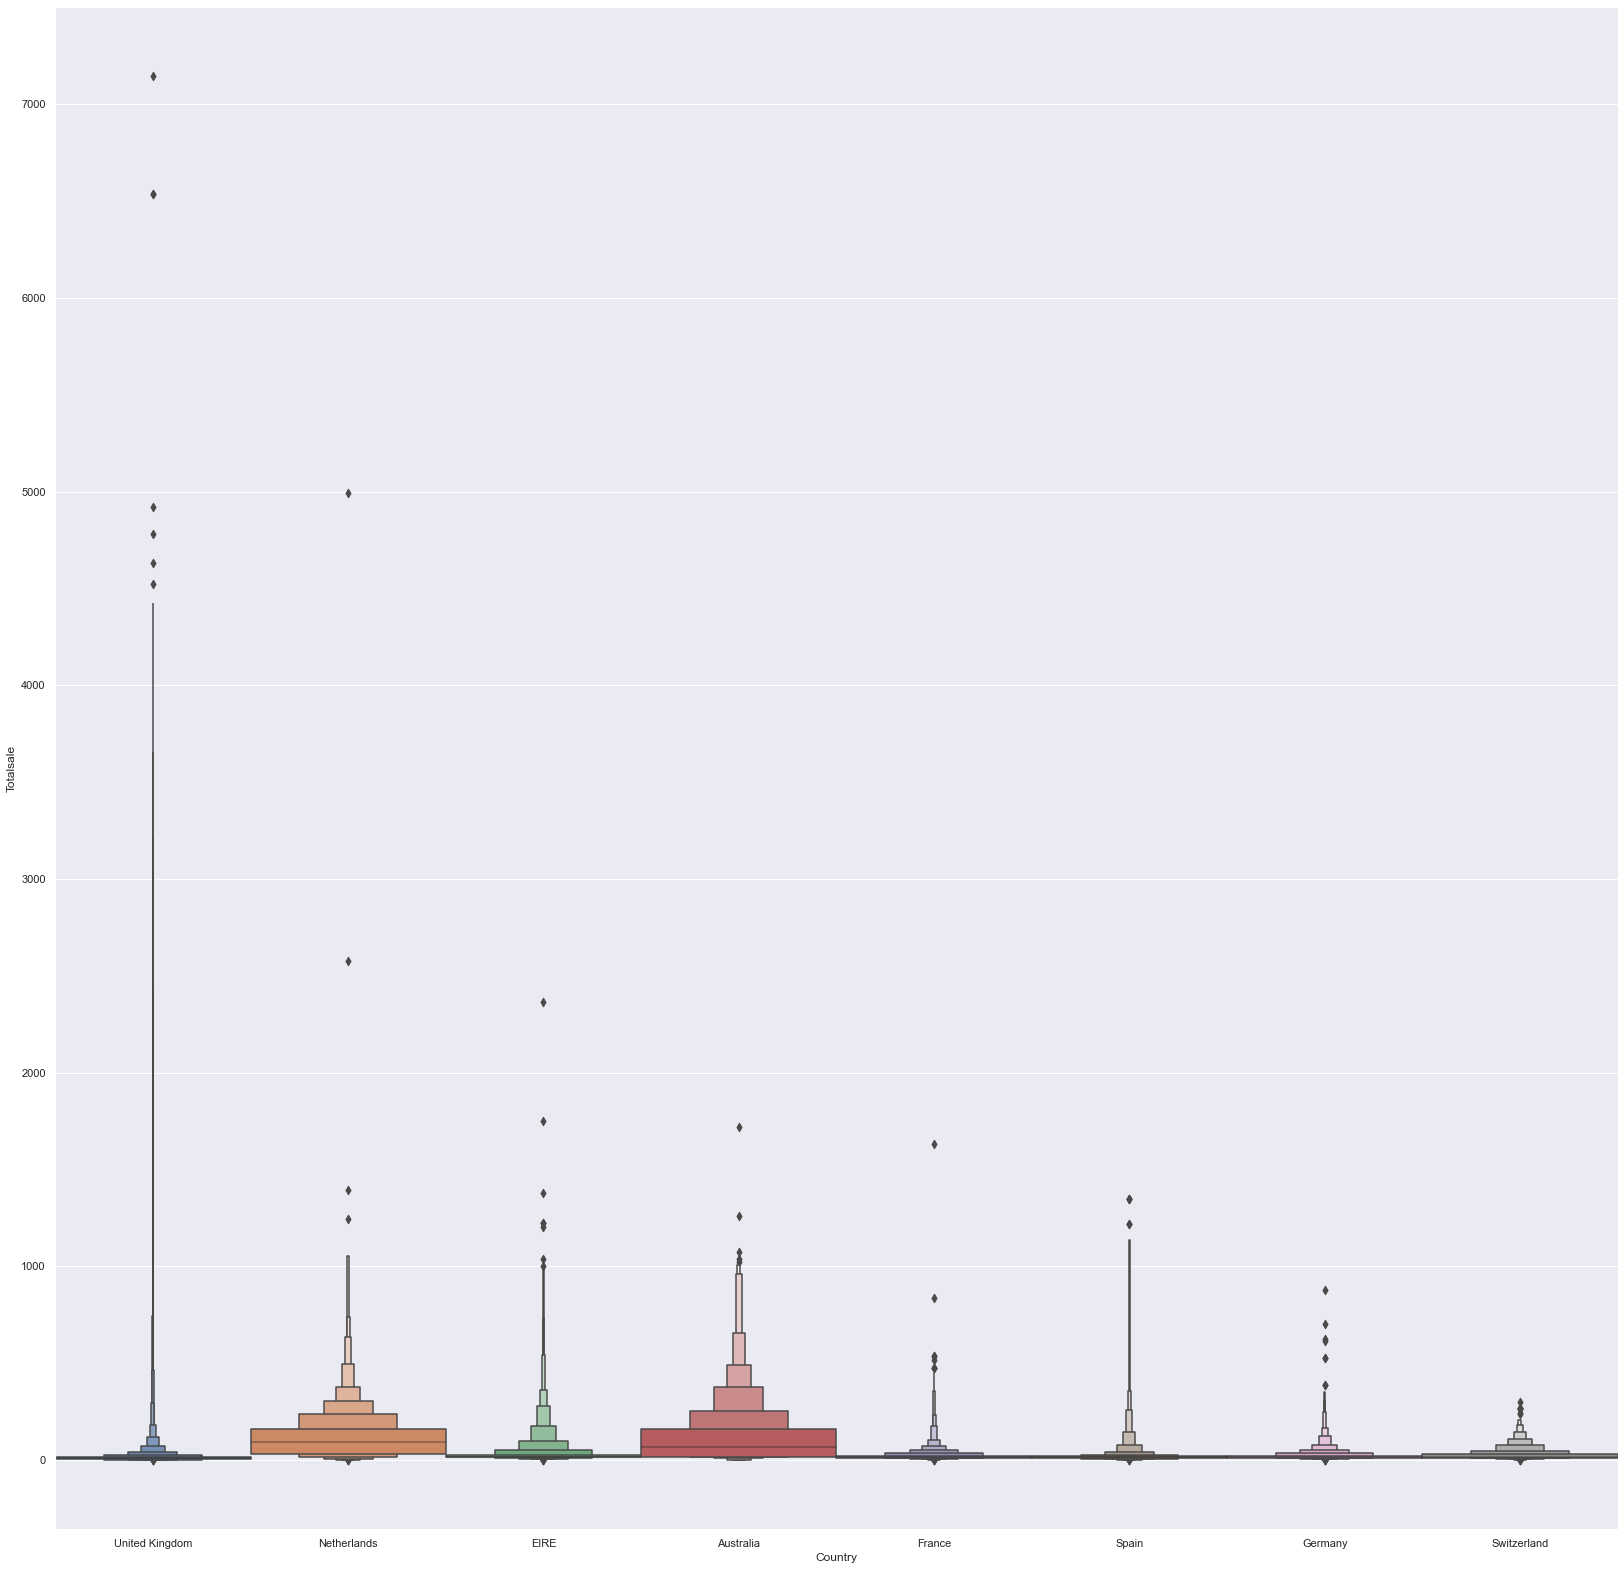

In [163]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
sns.set(rc={"figure.figsize":(28, 28)})
sns.boxenplot(x="Country", y="Totalsale", width = 1.0, data=country_sale)

# boxenplot  optimised way to represent data especially for large data-sets( compaired with box plot)
# we can see from the plot that the totalsale in all the countries are not symmetrical.
# the outliers are significant in UK, some customers spent big amount of money in 2011.

## 5.  Creating a new DataFrame with only the most 10 popular items 

### I will use Box Plot, Histogram, correlation with Heatmap, Scatter Plot to visualise the new dataframe

## 5.1 creating a new DataFrame

In [172]:
print()
# definition of most 10 popular items : the items which got the greatest counts
pop_item = df1.StockCode.value_counts()
pop_item.head(10)

#StockCode in pop_item pandas series is stored as DataFrame index, convert it into list
pop = pop_item[:10].index.tolist()
print('the top 10 popular items are:\n',pop)
print()

# create a new DataFrame that only have the top 10 items
data1 = df1.loc[df1.StockCode.isin(pop[:10])]
data1.month.astype(str)
data1.head()




the top 10 popular items are:
 ['85123A', '85099B', '22423', '47566', '20725', '84879', '22720', '22197', '21212', '20727']



,InvoiceNo,InvoiceDate,InvoiceTime,StockCode,Description,Quantity,UnitPrice,Totalsale,CustomerID,Country,year,weekdays,month
42486,539993,2011-01-04,1900-01-01 10:00:00,85099B,JUMBO BAG RED RETROSPOT,10,1.95,19.50,13313.0,United Kingdom,2011,Tuesday,1
42494,539993,2011-01-04,1900-01-01 10:00:00,85123A,WHITE HANGING HEART T-LIGHT HOLDER,12,2.95,35.40,13313.0,United Kingdom,2011,Tuesday,1
42537,540003,2011-01-04,1900-01-01 10:37:00,22720,SET OF 3 CAKE TINS PANTRY DESIGN,3,4.95,14.85,16875.0,United Kingdom,2011,Tuesday,1
42583,540013,2011-01-04,1900-01-01 11:30:00,22197,SMALL POPCORN HOLDER,19,0.85,16.15,16255.0,United Kingdom,2011,Tuesday,1
42644,540014,2011-01-04,1900-01-01 11:34:00,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.95,17.70,14606.0,United Kingdom,2011,Tuesday,1


## 5.2 The top 10 popular items are with SockCode of
####  ['85123A', '85099B', '22423', '47566', '20725', '84879', '22720', '22197', '21212', '20727']

1. '85123A': WHITE HANGING HEART T-LIGHT HOLDER
2. '85099B': JUMBO BAG RED RETROSPOT
3. '22423': REGENCY CAKESTAND 3 TIER
4. '47566': PARTY BUNTING
5. '20725': LUNCH BAG RED RETROSPOT
6. '84879': ASSORTED COLOUR BIRD ORNAMENT
7. '22720': SET OF 3 CAKE TINS PANTRY DESIGN
8. '22197': SMALL POPCORN HOLDER	
9. '21212': PACK OF 72 RETROSPOT CAKE CASES
10. '20727': LUNCH BAG BLACK SKULL.

## 5.3 create a dataframe which holds the top 10 popular items with the totalsale of each month in 2011

In [177]:
#create a new dataframe g1 ,splitting the object of 'StockCode'and "month", applying a function of count() to get the most counts of the items
g1 = data1.groupby( [ "StockCode", "month"] ).count().reset_index()

# slicing the data under condition thar with the 'StockCode' in the popular items and only "month" and 'Totalsale' columns
# ['85123A', '85099B', '22423', '47566', '20725', '84879', '22720', '22197', '21212', '20727']
# rename the column of 'Totalsale' to the item's name
# convert DataFrame to pd series,reset the index from 1 to 12

g2=g1.loc[g1.StockCode=='85123A',['month','Totalsale']]
g2.columns=['month','85123A']
g2.index = pd.RangeIndex(start=1, stop=13, step=1)

g3=g1.loc[g1.StockCode=='85099B',['month','Totalsale']]
g3.columns=['month','85099B']
g3.index = pd.RangeIndex(start=1, stop=13, step=1)

g4=g1.loc[g1.StockCode=='22423',['month','Totalsale']]
g4.columns=['month','22423']
g4.index = pd.RangeIndex(start=1, stop=13, step=1)

g5=g1.loc[g1.StockCode=='47566',['month','Totalsale']]
g5.columns=['month','47566']
g5.index = pd.RangeIndex(start=1, stop=13, step=1)

g6=g1.loc[g1.StockCode=='20725',['month','Totalsale']]
g6.columns=['month','20725']
g6.index = pd.RangeIndex(start=1, stop=13, step=1)

g7=g1.loc[g1.StockCode=='84879',['month','Totalsale']]
g7.columns=['month','84879']
g7.index = pd.RangeIndex(start=1, stop=13, step=1)

g8=g1.loc[g1.StockCode=='22720',['month','Totalsale']]
g8.columns=['month','22720']
g8.index = pd.RangeIndex(start=1, stop=13, step=1)


g9=g1.loc[g1.StockCode=='22197',['month','Totalsale']]
g9.columns=['month','22197']
g9.index = pd.RangeIndex(start=1, stop=13, step=1)

g10=g1.loc[g1.StockCode=='21212',['month','Totalsale']]
g10.columns=['month','21212']
g10.index = pd.RangeIndex(start=1, stop=13, step=1)

g11=g1.loc[g1.StockCode=='20727',['month','Totalsale']]
g11.columns=['month','20727']
g11.index = pd.RangeIndex(start=1, stop=13, step=1)


# merge all the pandas series to a new DataFrame

import pandas as pd
from functools import reduce

data_frames = [g2,g3,g4,g5,g6,g7,g8,g9,g10,g11]

df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['month'],
                                            how='outer'), data_frames).fillna('NaN')
df_merged

,month,85123A,85099B,22423,47566,20725,84879,22720,22197,21212,20727
0,1,173,119,132,64,87,77,152,74,89,71
1,2,146,123,132,80,106,74,155,76,96,50
2,3,193,172,198,160,121,113,180,92,127,111
3,4,182,123,177,193,111,120,34,74,124,69
4,5,219,189,192,250,155,142,12,107,123,112
5,6,144,183,136,208,146,91,98,102,96,107
6,7,165,184,141,187,133,105,103,96,98,139
7,8,147,180,139,156,162,113,111,81,87,122
8,9,175,221,152,143,161,140,140,127,127,144
9,10,166,194,173,99,123,150,151,149,116,123


## 5.4  Box Plot

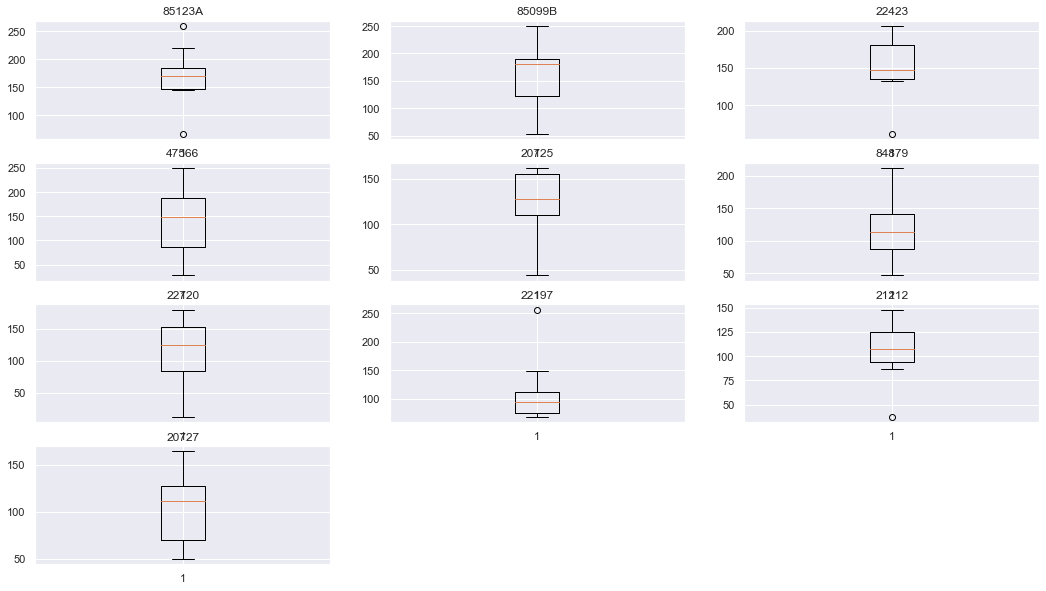

,month,85123A,85099B,22423,47566,20725,84879,22720,22197,21212,20727
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.00000,12.000000,12.000000
mean,6.500000,169.666667,166.000000,153.333333,138.166667,125.583333,115.333333,111.500000,108.50000,105.666667,105.250000
std,3.605551,46.180148,52.820451,39.453847,66.378848,35.338514,43.111554,55.547686,52.26245,28.655741,37.236651
min,1.000000,67.000000,54.000000,62.000000,28.000000,44.000000,47.000000,12.000000,68.00000,37.000000,50.000000
25%,3.750000,146.750000,123.000000,135.000000,87.500000,109.750000,87.500000,84.000000,75.50000,94.250000,70.500000
50%,6.500000,169.500000,181.500000,146.500000,149.500000,128.000000,113.000000,125.500000,94.00000,107.000000,111.500000
75%,9.250000,184.750000,190.250000,180.750000,188.500000,155.750000,140.500000,152.750000,112.00000,124.750000,127.000000
max,12.000000,259.000000,250.000000,206.000000,250.000000,162.000000,212.000000,180.000000,256.00000,148.000000,164.000000


In [178]:
plt.figure(1,figsize=(18,10))
for i in range(1,11):
    plt.subplot(4,3,i)
    plt.boxplot(df_merged[df_merged.columns[i]])
    plt.title(df_merged.columns[i])    
plt.show()
df_merged.describe()

## 5.5 Histogram Plot
### A Histogram plot is used to show how frequently a particular value appears in the data.



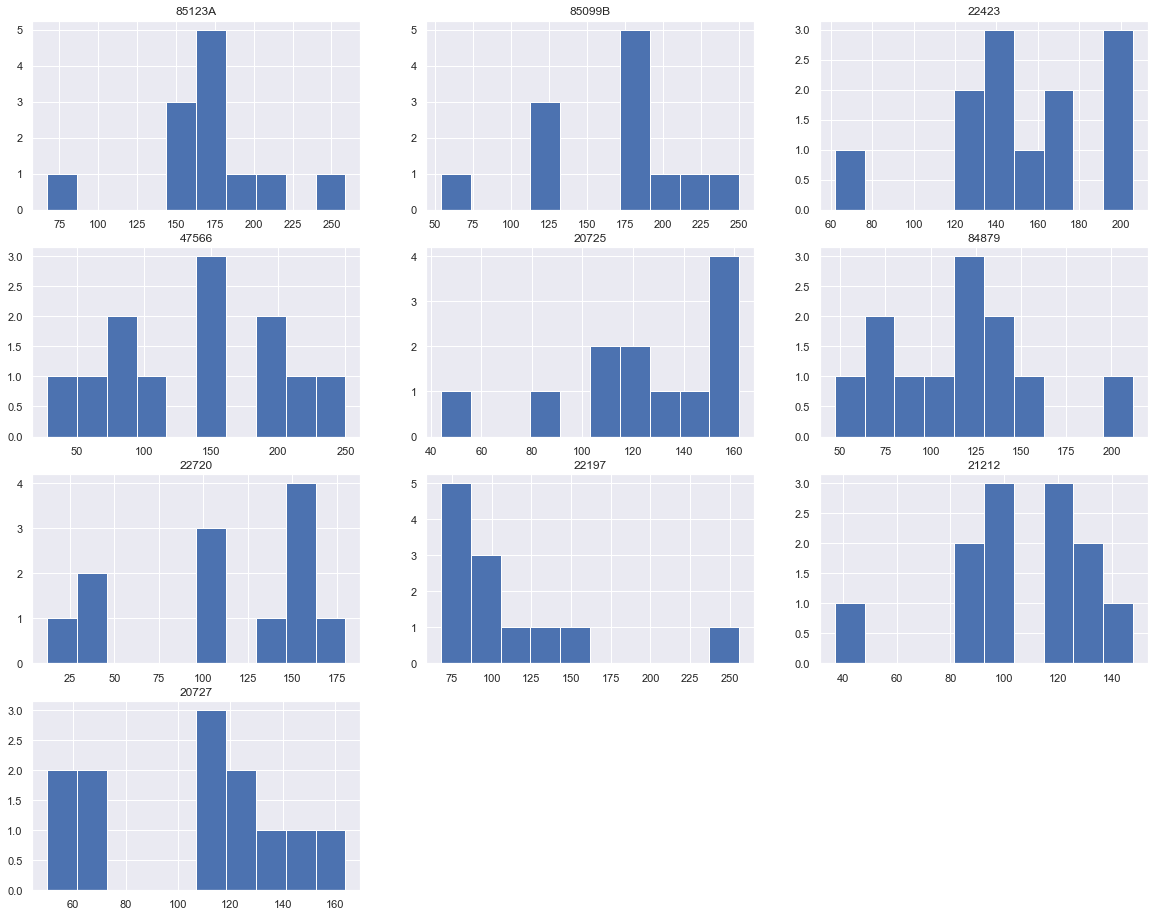

,month,85123A,85099B,22423,47566,20725,84879,22720,22197,21212,20727
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.00000,12.000000,12.000000
mean,6.500000,169.666667,166.000000,153.333333,138.166667,125.583333,115.333333,111.500000,108.50000,105.666667,105.250000
std,3.605551,46.180148,52.820451,39.453847,66.378848,35.338514,43.111554,55.547686,52.26245,28.655741,37.236651
min,1.000000,67.000000,54.000000,62.000000,28.000000,44.000000,47.000000,12.000000,68.00000,37.000000,50.000000
25%,3.750000,146.750000,123.000000,135.000000,87.500000,109.750000,87.500000,84.000000,75.50000,94.250000,70.500000
50%,6.500000,169.500000,181.500000,146.500000,149.500000,128.000000,113.000000,125.500000,94.00000,107.000000,111.500000
75%,9.250000,184.750000,190.250000,180.750000,188.500000,155.750000,140.500000,152.750000,112.00000,124.750000,127.000000
max,12.000000,259.000000,250.000000,206.000000,250.000000,162.000000,212.000000,180.000000,256.00000,148.000000,164.000000


In [179]:
plt.figure(1,figsize=(20,16))
for i in range(1,11):
    plt.subplot(4,3,i)
    plt.hist(df_merged[df_merged.columns[i]])
    plt.title(df_merged.columns[i])
plt.show()
df_merged.describe()

## 5.6 Heapmap

### Show Correlation between each item 


In [180]:
#drop the 'month 'column
df_merged = df_merged.drop(['month'], axis=1)
df_merged

,85123A,85099B,22423,47566,20725,84879,22720,22197,21212,20727
0,173,119,132,64,87,77,152,74,89,71
1,146,123,132,80,106,74,155,76,96,50
2,193,172,198,160,121,113,180,92,127,111
3,182,123,177,193,111,120,34,74,124,69
4,219,189,192,250,155,142,12,107,123,112
5,144,183,136,208,146,91,98,102,96,107
6,165,184,141,187,133,105,103,96,98,139
7,147,180,139,156,162,113,111,81,87,122
8,175,221,152,143,161,140,140,127,127,144
9,166,194,173,99,123,150,151,149,116,123


In [181]:
# create a list with all the column that only have numerical varieties
call_columns = [n for n,col in df_merged.items() if pd.api.types.is_numeric_dtype(col)]
call_columns

['85123A',
 '85099B',
 '22423',
 '47566',
 '20725',
 '84879',
 '22720',
 '22197',
 '21212',
 '20727']

<AxesSubplot:>

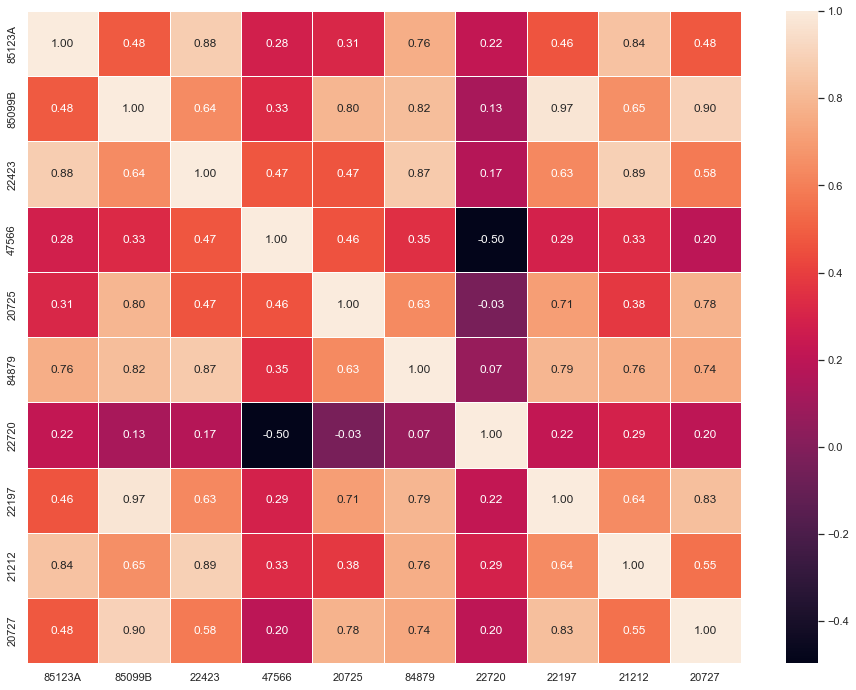

In [182]:
import pandas as pd 
from scipy.stats import spearmanr
import matplotlib.pyplot as plt
import seaborn as sns  # seaborn library
%matplotlib inline
#Turn on seaborn styling
sns.set()
corr = spearmanr(df_merged[call_columns]).correlation

plt.figure(figsize=(16,12))

#in this case we have set the x and y labels as they are not part of the data
# corr only holds the values in an array (see above)
sns.heatmap(corr, annot=True, fmt='.2f', linewidths=.5,
           xticklabels=call_columns, yticklabels=call_columns) 

# we can see that item '850998' has strong correlation with item "22197" and '20727'
# which is 0.97 and 0.90 seperarely

##  let us see item  ['850998'  , "22197" ,  '20727' ] look like 💓 it seems people like to buy them together  !💓💓

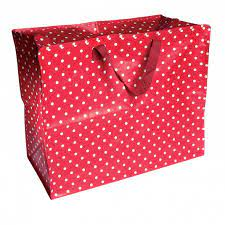





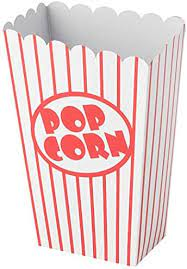



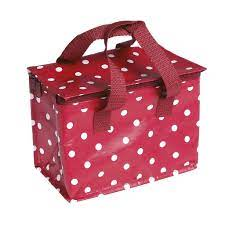